In [1]:
import rs_learn as rsl


#==============================================================#
# rs_learn: A library for applying machine learning processes  #
# and artificial neural network in Remote Sensing              #
#==============================================================#

#=====================================================================#
# Author:      Reginald Jay L. Argamosa <regi.argamosa@gmail.com>     #  
# Affiliation: University of the Philippines -                        #
#              Training Center for Applied Geodesy and Photogrammetry #
#=====================================================================#



In [2]:
# raster_path = os.getcwd()
raster_path = './'
raster_name = 'quezon_city'
raster_extension = 'tif'

In [3]:
# read raster file 
ras_to_df = rsl.Raster_to_dataframe(raster_path,
                                 raster_name,
                                  raster_extension)


        args: raster_path,
        raster_name,
        raster_extension
              
Opening ./quezon_city.tif raster

Rows: 571
Cols: 489
Pixel size: 0.00026902741531334857
Projection: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [4]:
#create dataframe
df = ras_to_df.make_df()

C:\Users\Dlaniger\Anaconda3\lib\site-packages\rs_learn\Raster_to_dataframe.py:132: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  self.df_to_use_idx = self.df_to_use.index.get_values()


In [5]:
#preview dataframe
df.head(3)

,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,band_10,band_11,band_12
995,598.0,619.0,763.0,722.0,1385.0,1520.0,1216.0,3049.0,3020.0,96.0,322.0,0.0
996,608.0,692.0,773.0,818.0,1371.0,1820.0,1707.0,3052.0,3021.0,96.0,322.0,0.0
997,900.0,940.0,1200.0,1124.0,1658.0,1825.0,1607.0,3054.0,3023.0,96.0,322.0,0.0


In [12]:
#change columns names
new_columns = ['Ultra_blue', 
              'Blue',
              'Green',
              'Red',
              'Nir',
              'Swir_1',
              'Swir_2',
              'Brightness_1',
              'Brightness_2',
              'Aerosol',
              'Pixel_qa',
              'Radsat_qa']
df.columns = new_columns
df.head(3)

,Ultra_blue,Blue,Green,Red,Nir,Swir_1,Swir_2,Brightness_1,Brightness_2,Aerosol,Pixel_qa,Radsat_qa
995,598.0,619.0,763.0,722.0,1385.0,1520.0,1216.0,3049.0,3020.0,96.0,322.0,0.0
996,608.0,692.0,773.0,818.0,1371.0,1820.0,1707.0,3052.0,3021.0,96.0,322.0,0.0
997,900.0,940.0,1200.0,1124.0,1658.0,1825.0,1607.0,3054.0,3023.0,96.0,322.0,0.0


In [13]:
# compute for ndvi the pandas way
df['ndvi'] = (df['Nir'] - df['Red']) / (df['Nir'] + df['Red'])

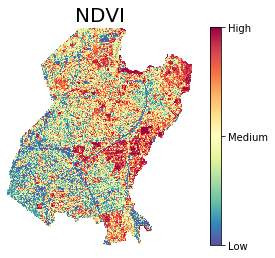

In [14]:
# rasterize and visualize
ras_to_df.df_to_raster(df['ndvi'],
                      'NDVI',
                      'reg')

In [16]:
# apply machine learning algorithms, kmeans for example
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, 
            random_state=0).fit(df)
clusters = km.predict(df)

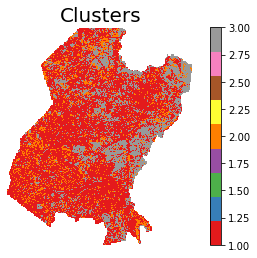

In [17]:
# rasterize and visualize
ras_to_df.df_to_raster(clusters,
                      'Clusters',
                      'clf')